In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist
import mpl_toolkits.axisartist.grid_finder as grid_finder
import mpl_toolkits.axisartist.angle_helper as angle_helper

from matplotlib.transforms import Affine2D
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_helper_curvelinear import GridHelperCurveLinear

In [2]:
def setup_axes(fig, rect):
    """Polar projection, but in a rectangular box."""

    # see demo_curvelinear_grid.py for details
    tr = Affine2D().scale(np.pi/180., 1.) + PolarAxes.PolarTransform()

    extreme_finder = angle_helper.ExtremeFinderCycle(
        20, 20, lon_cycle=360, lat_cycle=None, lon_minmax=None, lat_minmax=(0, np.inf),
    )

    grid_locator1 = angle_helper.LocatorDMS(12)
    grid_locator2 = grid_finder.MaxNLocator(5)

    tick_formatter1 = angle_helper.FormatterDMS()

    grid_helper = GridHelperCurveLinear(
        tr, extreme_finder=extreme_finder, grid_locator1=grid_locator1,
        grid_locator2=grid_locator2, tick_formatter1=tick_formatter1,
    )

    ax1 = fig.add_subplot(rect, axes_class=axisartist.Axes, grid_helper=grid_helper)
    ax1.axis[:].toggle(ticklabels=False)

    ax1.set_aspect(1.)
    ax1.set_xlim(-5, 12)
    ax1.set_ylim(-5, 10)

    return ax1

In [3]:
def add_floating_axis1(ax1):
    ax1.axis["lat"] = axis = ax1.new_floating_axis(0, 30)
    axis.label.set_text(r"$\theta = 30^{\circ}$")
    axis.label.set_visible(True)

    return axis

In [4]:
def add_floating_axis2(ax1):
    ax1.axis["lon"] = axis = ax1.new_floating_axis(1, 6)
    axis.label.set_text(r"$r = 6$")
    axis.label.set_visible(True)

    return axis

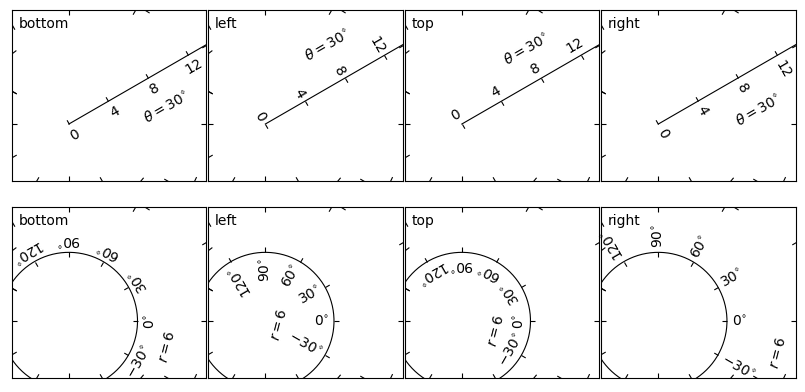

In [5]:
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(
    left=0.01, right=0.99, bottom=0.01, top=0.99, wspace=0.01, hspace=0.01,
)

for i, d in enumerate(["bottom", "left", "top", "right"]):
    ax1 = setup_axes(fig, rect=241++i)
    axis = add_floating_axis1(ax1)
    axis.set_axis_direction(d)
    ax1.annotate(
        d, (0, 1), (5, -5), va="top", ha="left",
        xycoords="axes fraction", textcoords="offset points",
    )

for i, d in enumerate(["bottom", "left", "top", "right"]):
    ax1 = setup_axes(fig, rect=245++i)
    axis = add_floating_axis2(ax1)
    axis.set_axis_direction(d)
    ax1.annotate(
        d, (0, 1), (5, -5), va="top", ha="left",
        xycoords="axes fraction", textcoords="offset points",
    )

plt.show()